Nice chatbox - going to tweak it for a rule-based chatbot:

https://www.analyticsvidhya.com/blog/2021/07/build-a-simple-chatbot-using-python-and-nltk/

In [40]:
# GUI with Tkinter - box works - not tied to 'msg' or 'res'
import tkinter
from tkinter import *
# Function to send message and get response

def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12))
        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

# GUI setup

base = Tk()
base.title("Chatbot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial")
ChatLog.config(state=DISABLED)
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5, bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff', command= send )
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=25, width=265)
SendButton.place(x=6, y=401, height=25)
base.mainloop()

**Close the chat window to proceed**

Modified the GUI display to work with the basic rules

In [43]:
# GUI with Tkinter - box works
import tkinter
from tkinter import *

# Function to send message and get response

def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)    
    if msg != "":
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12))
        msg = msg.lower()
        if msg == "hello":
            res = "Hello!"
        elif msg == "hi":
            res = "Hello!"
        elif msg == "good bye":
            res = "Good bye!"
        elif msg == "quit":
            res = "Good bye!"
        else:
            res = "Sorry! I don't understand" 
        ChatLog.insert(END, "Bot: " + res + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

# GUI setup
base = Tk()
base.title("Chatbot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

# Inserting starting comment in ChatLog
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial")
ChatLog.config(state=NORMAL)  # Set state to NORMAL to allow inserting text
ChatLog.insert(END, "Bot: Hi! I am a chatbot created\nby Anna Hojdila for your service.\nEnter 'quit' when you are finished.\n\n")
ChatLog.config(state=DISABLED) # Set state back to DISABLED after inserting text
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5, bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff', command= send )
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=25, width=265)
SendButton.place(x=6, y=401, height=25)
base.mainloop()

**Close the Chatbot window to proceed**

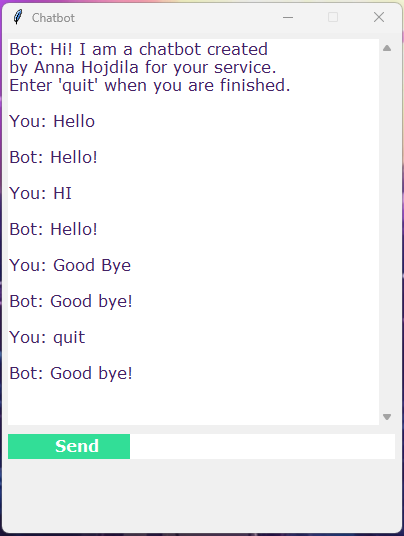

In [3]:
from IPython.display import Image
img = './images/GUI_chatbot.png'
Image(filename=img)

An Excel list of messages and responses will create the intent combinations for the chatbot

In [45]:
import pandas
import numpy as np
# Read excel document
excel_data_df = pandas.read_excel('./data/paired_responses.xlsx', sheet_name='Sheet1', header=None)

msgs = excel_data_df.get(0).tolist()
responses = excel_data_df.get(1).tolist()

# zip the two lists together to create a list of key-value pairs
key_value_pairs = zip(msgs, responses)

# convert the list of key-value pairs to a dictionary
intents = dict(key_value_pairs)

In [53]:
type(intents)

dict

In [47]:
import tkinter
from tkinter import *

# Load responses
responses = intents

# Function to send message and get response
def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0", END)
    
    if msg != "":
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12))
        msg = msg.lower()

        # Fetch response from intents
        res = responses.get(msg, "Sorry! I don't understand, please enter\n the course without spaces")

        ChatLog.insert(END, "Bot: " + res + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

# GUI setup
base = Tk()
base.title("Chatbot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

# Inserting starting comment in ChatLog
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial")
ChatLog.config(state=NORMAL)  # Set state to NORMAL to allow inserting text
ChatLog.insert(END, "Bot: Hi! I am a chatbot created\nby Anna Hojdila for your service.\nEnter 'quit' when you are finished.\n\n Which course site are you looking for?\n\
Enter MIS4900, MIS4460, MIS4470,\n MIS6900, MIS5460, MIS5470\n\n")
ChatLog.config(state=DISABLED)  # Set state back to DISABLED after inserting text
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="circle")
ChatLog['yscrollcommand'] = scrollbar.set

SendButton = Button(base, font=("Verdana", 12, 'bold'), text="Send", width="12", height=5, bd=0, bg="#32de97", activebackground="#3c9d9b", fg='#ffffff', command=send)
EntryBox = Text(base, bd=0, bg="white", width="29", height="5", font="Arial")
scrollbar.place(x=376, y=6, height=386)
ChatLog.place(x=6, y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=25, width=265)
SendButton.place(x=6, y=401, height=25)

base.mainloop()

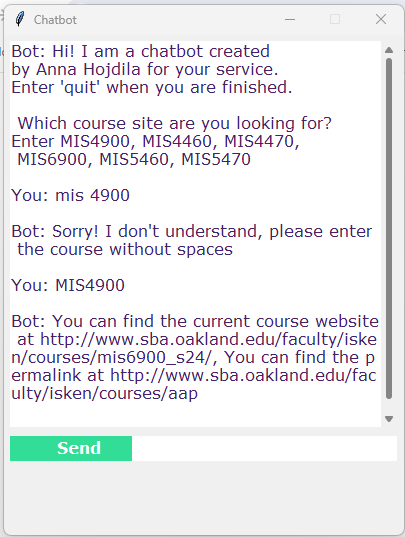

In [50]:
from IPython.display import Image
img = './images/GUI_chatbot_final.png'
Image(filename=img)

I like how the chatbot works, I played around with the formatting, but there is definitely room for improvement - if the ChatLog portion is enlarged, the scrollbar, send button and entrybox all need to be relocated